# Introdução ao Pandas
## DataFrame e Series

In [4]:
import pandas as pd
import numpy as np

## Series

In [10]:
#ARgumento : Listas/vetores

serie_inicial = pd.Series(np.random.randn(5))

print(serie_inicial)

serie_inicial = pd.Series(np.random.randn(5),index = ["A","B","C","D","E"])

serie_lista = pd.Series(["Python","SQL","VBA"])

serie_lista

0   -1.305676
1    1.464089
2   -1.743248
3    0.309272
4   -0.505580
dtype: float64


0    Python
1       SQL
2       VBA
dtype: object

In [17]:
# A partir de Dicionarios,criando séries temporais

dicionario_cotacoes = {"WEGE3":20.20,"PETR4":19.28,"VALE3":64.90,"PETZ3": 12.03}

serie_cotacoes = pd.Series(dicionario_cotacoes)

print(serie_cotacoes)
print(serie_cotacoes["WEGE3"])
print(serie_cotacoes[0])

WEGE3    20.20
PETR4    19.28
VALE3    64.90
PETZ3    12.03
dtype: float64
20.2
20.2


## Data Frames

In [18]:
# A partir de outras séries ou dicionarios

dicionario_dados = {
    "Empresas": pd.Series(["Wege","Petrobras","Vale"], index= ["2019","2020","2021"]),
    "Price": pd.Series([20,30,40],index= ["2019","2020","2021"]),
    "Volume": pd.Series([1000,4000,7500],index= ["2019","2020","2021"])
}

dados_diarios = pd.DataFrame(dicionario_dados)
dados_diarios

,empresas,price,volume
2019,Wege,20,1000
2020,Petrobras,30,4000
2021,Vale,40,7500


In [19]:
#outra forma de fazer um dicionario um dataframe

dicionario_dados2 = {
    "Empresas": ["Wege","Petrobras","Vale"],
    "Price": [20,30,40],
    "Volume": [1000,4000,7500]
}

dados_diarios_from_dict = pd.DataFrame(dicionario_dados2,index= ["2019","2020","2021"])

dados_diarios_from_dict

,Empresas,Price,Volume
2019,Wege,20,1000
2020,Petrobras,30,4000
2021,Vale,40,7500


In [20]:
#escolhendo colunas

dicionario_dados = {
   "Empresas": ["Wege","Petrobras","Vale"],
    "Price": [20,30,40],
    "Volume": [1000,4000,7500]

}

dados_diarios_from_dict = pd.DataFrame(dicionario_dados2,index= ["2019","2020","2021"],
                                        columns=["Volume","Price","Empresas"])

dados_diarios_from_dict

,Volume,Price,Empresas
2019,1000,20,Wege
2020,4000,30,Petrobras
2021,7500,40,Vale


In [26]:
#cuidado quando criar dataframe e esquecer de passa o indice ex: (Para datafreme tem que passar o index)

dado = {"cotacao":20,"dia":"22-02-02"}

dataframe = pd.DataFrame(dado)
#resoluão
dataframe = pd.DataFrame(dado,index = [0])
 
dataframe

,cotacao,dia
0,20,22-02-02


# Exercícios

* Exercício 34: Crie uma série de numeros.   
* Exercício 35: Crie uma série de cotação randomica (random walk) para os próximos 30 dias de uma ação, partindo do preço inicial definido pelo usuário. Pressuponha que a média de retornos da ação é zero e seu desvio padrão diário (volatilidade) é de 1%.  
* Exercício 36: Crie um DataFrame com as seguintes informações:
       tickers: “WEGE3”, "PETR3", "VALE3", "PETR4" e "LREN3"
       cotacoes: 20, 30, 40, 12, 35  
       nomes: "Weg", "Petrobras", "Vale", "Petrobras" e "Lojas Renner"
       preco_sobre_lucro: 25, 6, 12, 7, 25  
       volume: 5000, 1000, 4000, 7000, 1200

In [30]:
#exercicio 34

Serie_de_numeros = np.arange(100)

index_serie = np.arange(100)

table = pd.DataFrame(Serie_de_numeros,index=[index_serie])

table


,0
0,0
1,1
2,2
3,3
4,4
...,...
95,95
96,96
97,97
98,98


                 0
Dia 1:   20.080303
Dia 2:   20.186658
Dia 3:   20.051239
Dia 4:   20.135079
Dia 5:   20.101227
Dia 6:   20.037696
Dia 7:   20.169411
Dia 8:   20.171340
Dia 9:   20.002068
Dia 10:  20.181261
Dia 11:  20.099005
Dia 12:  20.082649
Dia 13:  20.022788
Dia 14:  20.059704
Dia 15:  20.069761
Dia 16:  20.001227
Dia 17:  20.035853
Dia 18:  20.140422
Dia 19:  20.185676
Dia 20:  20.036382
Dia 21:  20.109256
Dia 22:  20.120628
Dia 23:  20.087687
Dia 24:  20.081445
Dia 25:  20.190849
Dia 26:  20.087888
Dia 27:  20.004452
Dia 28:  20.014153
Dia 29:  20.108148
Dia 30:  20.143888


<AxesSubplot: >

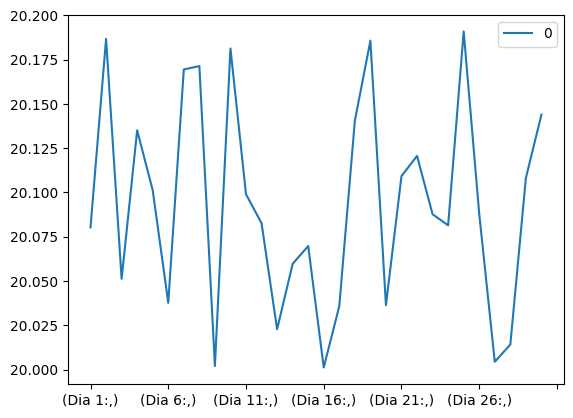

In [58]:
#35

preco_inicio = float(input("digite o preço de inicio"))
dias = np.arange(30)
cotacoes_radomicas = np.random.uniform(low = preco_inicio, high = (preco_inicio + (preco_inicio * (1/100))) , size = 30)

tabela_randomicas = pd.DataFrame(cotacoes_radomicas,index = [list(map(lambda x : f"Dia {x +1}:",dias))])

print(tabela_randomicas)
tabela_randomicas.plot()

In [ ]:
#gabarito 35
import random

cotacao_inicial = float(input("Qual a cotação inicial da ação? "))

periodo_projecao = 30
lista_cotacoes = [cotacao_inicial]
lista_dias = [0]
volatilidade_diaria = 0.01

for i in range(1, periodo_projecao):
    
    cotacao_seguinte = lista_cotacoes[-1] * (1 + np.random.normal(0, volatilidade_diaria))
    
    lista_cotacoes.append(cotacao_seguinte)
    lista_dias.append(i)
    
serie_final = pd.Series(lista_cotacoes, index = lista_dias)

print(serie_final)

In [51]:
Carteira = {
    "Tickers" : ["WEGE3", "PETR3", "VALE3", "PETR4", "LREN3"],
    "cotacoes": [20, 30, 40, 12, 35 ],
    "nomes": ["Weg", "Petrobras", "Vale", "Petrobras","Lojas Renner"],
    "Preco sobre lucro": [25, 6, 12, 7, 25 ],
    "volume": [5000, 1000, 4000, 7000, 1200]
}

carteira_dataframe = pd.DataFrame(Carteira,index=[np.arange(5)])

carteira_dataframe

,Tickers,cotacoes,nomes,Preco sobre lucro,volume
0,WEGE3,20,Weg,25,5000
1,PETR3,30,Petrobras,6,1000
2,VALE3,40,Vale,12,4000
3,PETR4,12,Petrobras,7,7000
4,LREN3,35,Lojas Renner,25,1200
